# Data Transformation
- scaling
- categorical encoding

## Scaling
- MinMax scaling
- Standard scaling
- robust scaling

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [106]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [107]:
df.head()

,x1,x2,x3
0,-0.250050,1.732639,-6.784412
1,3.312797,5.559908,-1.782679
2,-3.311995,4.116665,-15.973714
3,3.563810,4.125848,-5.456815
4,0.501672,5.710227,-2.510568


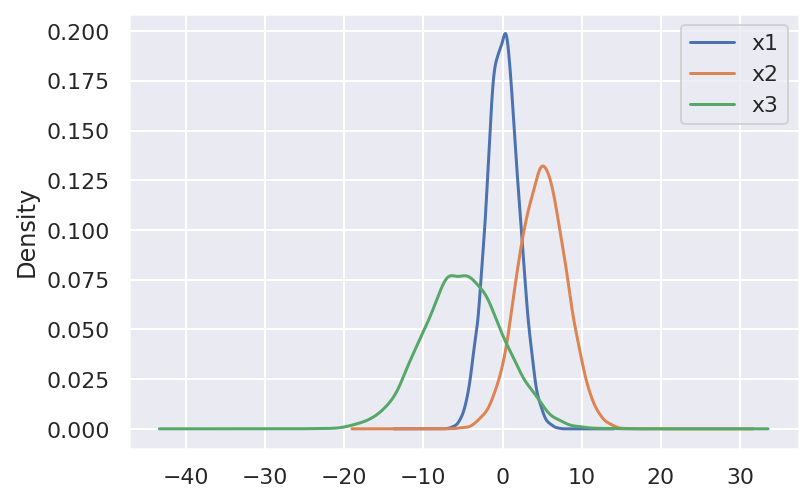

In [108]:
# plotting data

df.plot.kde()  # Generate Kernel Density Estimate plot using Gaussian kernels.

- Standard Scaling
  - z = (x - mean) / std 

In [109]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_tf = ss.fit_transform(df)     # returns an array
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

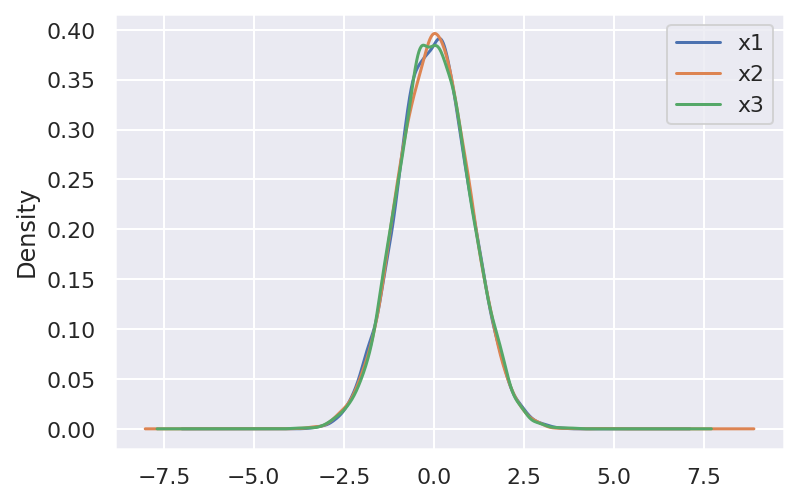

In [110]:
df.plot.kde()

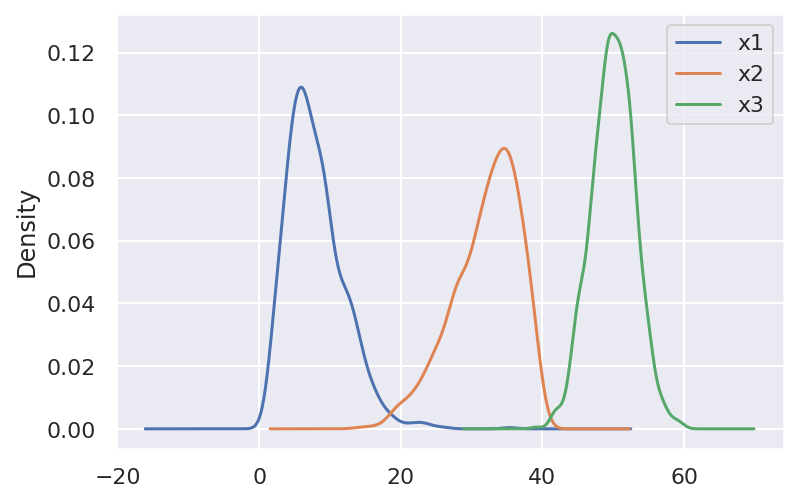

In [ ]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

df.plot.kde()

- MinMax scaler

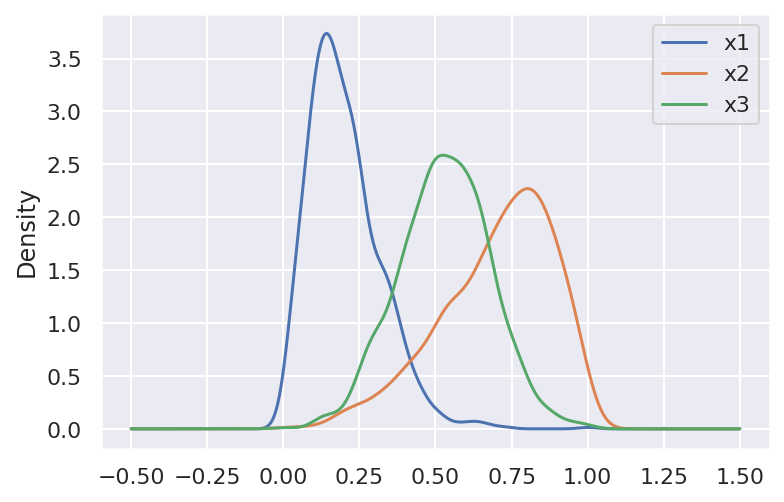

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [ ]:
df.x2.max()

1.0

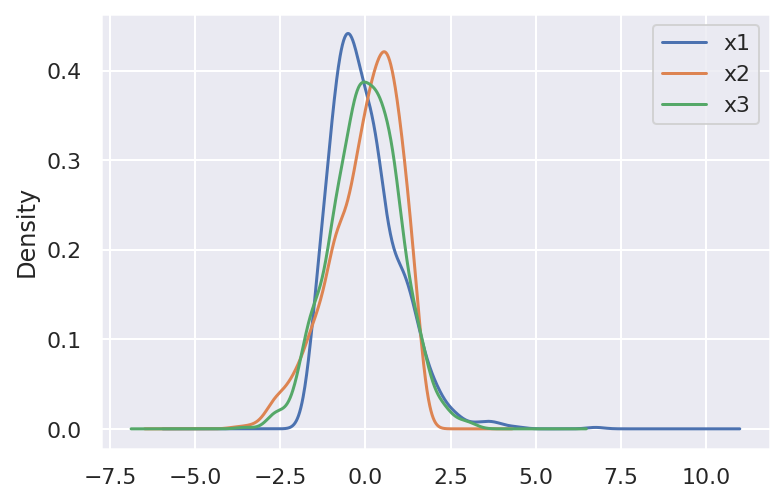

In [ ]:
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)

df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [111]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 1, 25)]),
})

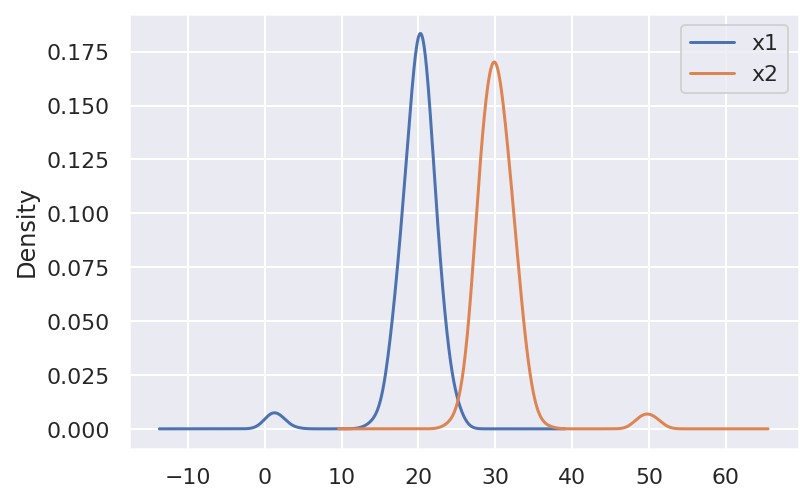

In [112]:
df.plot.kde()

- Robust scaler
  - z = (x-median)/IQR
  - robust to outliers
  - This Scaler removes the median and scales the data according to the quartile range (defaults to IQR: Interquartile Range).


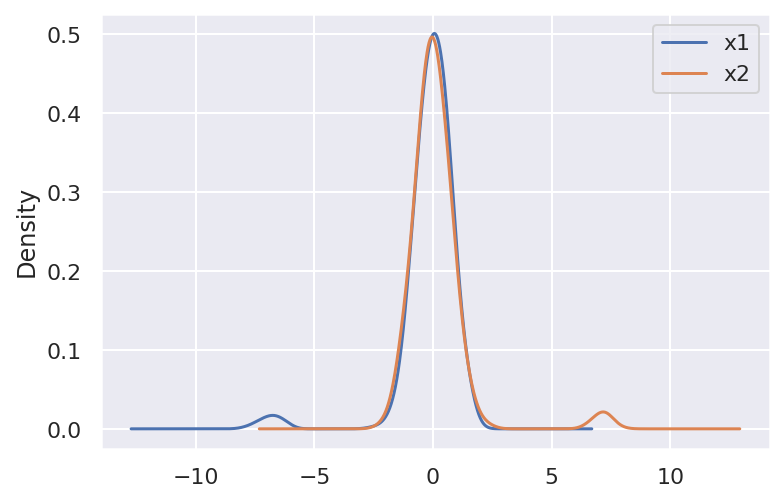

In [ ]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

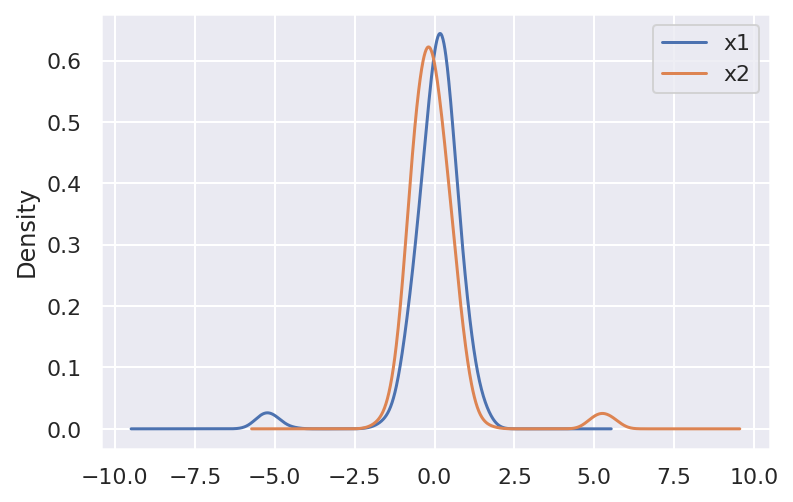

In [113]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

## 7. Categorical encoding


#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [114]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [115]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

In [116]:
ord = OrdinalEncoder(categories=[['Low','Medium','High']])
ord.fit_transform(df['Income'].values.reshape(-1,1))

array([[0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.]])

In [117]:
ord.categories_

[array(['Low', 'Medium', 'High'], dtype=object)]

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [119]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})
df

,Age,Gender
0,33,Male
1,44,Female
2,22,Male
3,44,Female
4,55,Male
5,22,Male


In [120]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [121]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()   # encode labels with values between 0 and (no. of class -1)
df['gender_tf'] = le.fit_transform(df.Gender)

In [122]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [123]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['Gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [124]:
# same as the above
ohe.fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [125]:
ohe.get_feature_names()

array(['x0_0', 'x0_1'], dtype=object)

- use pandas.dummies()

In [126]:
pd.get_dummies(df['gender_tf'], prefix='gender')

,gender_0,gender_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1


In [ ]:
pd.get_dummies(df['Gender'], prefix='gender')

,gender_Female,gender_Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1


## Text Processing - CountVectorizer


- CountVectorizer
  * Each column represents one word, count refers to frequency of the word
  * Sequence of words are not maintained

- Hyperparameters
  * n_grams - Number of words considered for each column
  * stop_words - words not considered
  * vocabulary - only words considered


In [ ]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
cv.fit_transform(df.Text)

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [ ]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

In [ ]:
cv.get_feature_names()

['and',
 'awesome',
 'document',
 'first',
 'food',
 'impossible',
 'is',
 'mission',
 'one',
 'second',
 'the',
 'third',
 'this']

In [ ]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'is': 6,
 'mission': 7,
 'one': 8,
 'second': 9,
 'the': 10,
 'third': 11,
 'this': 12}

In [ ]:
# help(cv)

In [ ]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'mission': 6,
 'one': 7,
 'second': 8,
 'third': 9,
 'this': 10}

In [ ]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'food': 1, 'mission': 0, 'second': 2}

In [ ]:
cv = CountVectorizer(ngram_range=[1,2])  
# ngram_range: the lower and upper boundary of the range
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]])

In [ ]:
cv.vocabulary_, len(cv.vocabulary_)

({'and': 0,
  'and the': 1,
  'awesome': 2,
  'awesome food': 3,
  'document': 4,
  'document awesome': 5,
  'first': 6,
  'first document': 7,
  'food': 8,
  'impossible': 9,
  'is': 10,
  'is mission': 11,
  'is the': 12,
  'is this': 13,
  'mission': 14,
  'mission impossible': 15,
  'one': 16,
  'one the': 17,
  'second': 18,
  'second document': 19,
  'second second': 20,
  'the': 21,
  'the first': 22,
  'the is': 23,
  'the second': 24,
  'the third': 25,
  'third': 26,
  'third one': 27,
  'this': 28,
  'this is': 29,
  'this the': 30},
 31)

In [ ]:
cv = CountVectorizer(ngram_range=[1,2], stop_words='english')  
# stop_words: Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다.
# 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다.
cv.fit_transform(df.Text).toarray()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
cv.vocabulary_

{'awesome': 0,
 'awesome food': 1,
 'document': 2,
 'document awesome': 3,
 'food': 4,
 'impossible': 5,
 'mission': 6,
 'mission impossible': 7,
 'second': 8,
 'second document': 9,
 'second second': 10}

## Text Processing - TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = CountVectorizer(stop_words='english')
vectorizer2 = TfidfVectorizer(stop_words='english') 
# a built-in stop word list for English is used.

In [ ]:
vectorizer1.fit_transform(df.Text).toarray().round(2)

array([[1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
vectorizer2.fit_transform(df.Text).toarray().round(2)

array([[0.64, 0.41, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.  , 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.71, 0.71, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
vectorizer1.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [ ]:
vectorizer2.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [ ]:
vectorizer2.vocabulary_

{'awesome': 0,
 'document': 1,
 'food': 2,
 'impossible': 3,
 'mission': 4,
 'second': 5}